# ECE 59500 Machine Learning: Assignment 1

# Exercise 1: Installing Python and Getting Started

In [11]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import cvxpy as cp
import csv
import imageio

# Exercise 2: Generating 1D Random Variables

## (a)
$$\mathbb{E}[X]
= \int_{-\infty} ^{\infty} f_X (x)\\
=\int_{-\infty} ^{\infty} \frac{1}{\sqrt{2\pi \sigma ^2}} xe^{-\frac{(x-\mu)^2}{2\sigma ^2}} dx\\
=\int_{-\infty} ^{\infty} \frac{1}{\sqrt{2\pi \sigma ^2}} (y+\mu)e^{-\frac{y^2}{2\sigma ^2}} dx\\
=\int_{-\infty} ^{\infty} \frac{1}{\sqrt{2\pi \sigma ^2}} ye^{-\frac{y^2}{2\sigma ^2}} dy+\mu \int_{-\infty} ^{\infty} \frac{1}{\sqrt{2\pi \sigma ^2}} e^{-\frac{y^2}{2\sigma ^2}} dy\\
=0+\mu\\
=\mu$$
The first term in the last line vanished because the integrand is odd. The second term becomes μ because the integrand is the PDF of the zero mean Gaussian.
$$Var[X]
=\frac{1}{\sqrt{2\pi \sigma ^2}} \int_{-\infty}^{\infty} (x-\mu)^2 e^{-\frac{(x-\mu)^2}{2\sigma ^2}} dx\\
=\frac{1}{\sqrt{2\pi \sigma ^2}} \int_{-\infty}^{\infty} y^2 e^{-\frac{y^2}{2\sigma ^2}} dy\\
=\frac{\sqrt{2\sigma ^2}}{\sqrt{2\pi \sigma ^2}} \int_{-\infty}^{\infty} (\sqrt{2\sigma ^2}z)^2 e^{-z^2} dz\\
=\frac{2\sigma ^2}{\sqrt{\pi }} \int_{-\infty}^{\infty} z^2 e^{-z^2} dz\\
=\frac{2\sigma ^2}{\sqrt{\pi }}[0+\frac{1}{2} \sqrt{\pi }]\\
=\sigma ^2
$$

## (b)

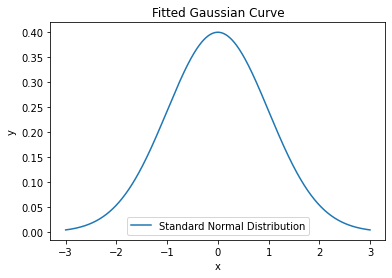

In [14]:
x = np.linspace(-3, 3, 1000)
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-x ** 2 / 2)
plt.plot(x, y, label="Standard Normal Distribution")
plt.title('Fitted Gaussian Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## (c)

### (iii)

In [15]:
mu = 0
sigma = 1
samples = 1000

X = np.random.normal(mu, sigma, samples)
(mu_, sigma_) = stats.norm.fit(X)
x = np.linspace(min(X), max(X), 1000)
curve = stats.norm.pdf(x, mu_, sigma_)
print("Mean:    ", mu_, "\nStd dev: ", sigma_)

Mean:     -0.010214791209214797 
Std dev:  0.9913677466881734


### (iv)

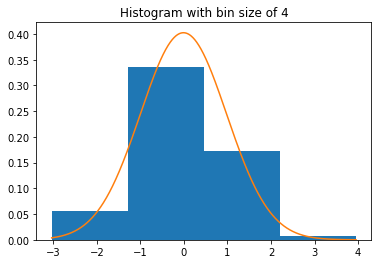

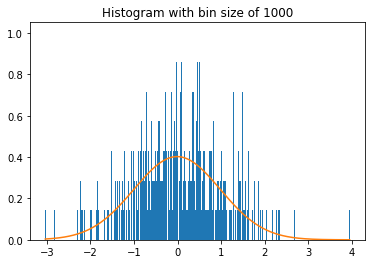

In [18]:
plt.figure(1)
plt.title("Histogram with bin size of 4")
plt.hist(X, bins=4, density=True)
plt.plot(x, curve)
    
plt.figure(2)
plt.title("Histogram with bin size of 1000")
plt.hist(X, bins=1000, density=True)
plt.plot(x, curve)

### (v)
They are not good representative of the data’s distribution according to the plot. When the bin is set to 4, the bin **isn’t sufficient enough** to tell the distribution’s behavior clearly. When the bin is set to 1000, there are **too many bins** without enough data to fill in the histogram.

## (d)

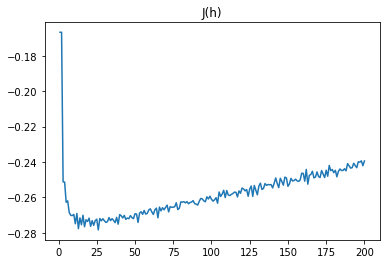

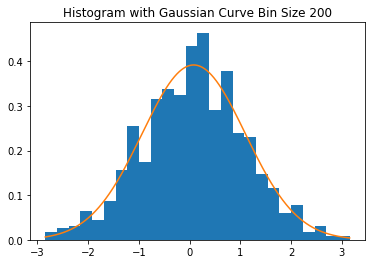

In [22]:
X = np.random.normal(mu, sigma, samples)
J_h = []
num_bins = range(1, 200+1)

for m in num_bins:
    v, bins, patches = plt.hist(X, bins=m)
    plt.clf()

    h = bins[1] - bins[0]
    p = v / samples
    J = (2 / (h * (samples - 1)) - (samples + 1) * (sum(p ** 2) / (h * (samples - 1))))
    J_h.append(J)

# Find m that minimizes J_h
opt_bins = num_bins[np.argmin(J_h)]
    
# Fit normalized Gaussian curve to data
mu_, sigma_ = stats.norm.fit(X)
x = np.linspace(min(X), max(X), samples)
curve = stats.norm.pdf(x, mu_, sigma_)
    
plt.figure(1)
plt.title("J(h)")
plt.plot(num_bins, J_h)

# Normalized histogram with fitted Gaussian curve
plt.figure(2)
plt.title("Histogram with Gaussian Curve Bin Size 200")
plt.hist(X, bins=opt_bins, density=True)
plt.plot(x, curve)

From the plot we could tell, the m* that minimizes the J is at 200. Which means when we plot the histogram with 200 number of bins, it is the estimated optimal bin. The new histogram fits curve better because the bin is sufficient enough to provide information from the data.

# Exercise 3:

## (a)

### (i)
$$
f(x) = \frac{1}{2\pi |\Sigma |^\frac{1}{2}} \text{exp}\{-\frac{1}{2}(x-\mu )^T \Sigma^{-1} (x-\mu )\}\\
=\frac{1}{2\pi \sqrt{3} }\text{exp}\{-\frac{1}{2} \begin{bmatrix} x-2\\y-6 \end{bmatrix}^{T}*\frac{1}{3} \begin{bmatrix} 2 & -1\\-1 & 2 \end{bmatrix} * \begin{bmatrix} x-2\\y-6 \end{bmatrix} \}\\
=\frac{1}{2\pi \sqrt{3} }\text{exp}\{-\frac{1}{6} \begin{bmatrix} x-2&y-6 \end{bmatrix}*\begin{bmatrix} 2 & -1\\-1 & 2 \end{bmatrix} * \begin{bmatrix} x-2\\y-6 \end{bmatrix} \}\\
=\frac{1}{2\pi \sqrt{3} }\text{exp}\{-\frac{1}{6} [2x^2+4x-2xy-20y+2y^2+56]\}
$$


### (ii)

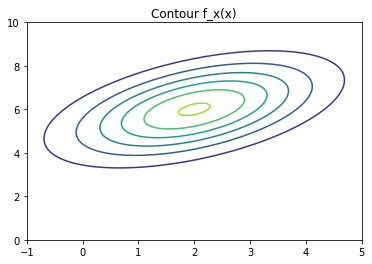

In [25]:
x1 = np.linspace(-1, 5, 100)
y1 = np.linspace(0, 10, 100)
(x, y) = np.meshgrid(x1, y1)
position = np.empty(x.shape + (2,))
position[:, :, 0] = x
position[:, :, 1] = y
z = stats.multivariate_normal([2., 6.], [[2., 1.], [1., 2.]])
z = z.pdf(position)
plt.title("Contour f_x(x)")
plt.contour(x, y, z)

## (b)
###(i)

$$
\mathbb{E}[Y] = \mathbb{E} [AX+b]\\
=A\mathbb{E}[X]+\mathbb{E}[b]\\
=0+b\\
=b
$$

$$
Σ_Y\\
=\mathbb{E}[(Y-\mu _Y)(Y-\mu _Y)^T]\\
=\mathbb{E}[YY^T -Y\mu_{Y}^{T}-\mu_Y Y^T +\mu_Y\mu_{Y}^{T}]\\
=\mathbb{E}[YY^T - 2Y\mu_{Y}^{T}+\mu_{Y}^{T}]\\
=\mathbb{E}[AXX^TA^T+AXb^T+b(AX)^T+bb^T-2AXb^T-2bb^T+bb^T]\\
=A\mathbb{E}[XX^T]A^T\\
=AΣ_XA^T\\
=AA^T
$$

### (ii)

$$
Σ_Y=AA^T\\
(Σ_Y)^T=(AA^T)^T=(A^T)^TA^T=AA^T=Σ^Y\\
xΣ_Yx=xAA^Tx=(xA)^2\ge 0
$$

Based on above, ΣY is symmetric positive semi-definite.

### (iii)

If A is invertible, then ΣY would become symmetric positive definite matrix.

### (iv)

$$
\mu_Y=\begin{bmatrix}2\\6\end{bmatrix}\\
Σ_Y=\begin{bmatrix}2&1\\1&2\end{bmatrix}\\
Σ_Y=AA^T\\
=\mathbb{E}\Sigma(\mathbb{E}Σ)^{Γ}\\
$$

$$
A = \mathbb{E}Σ = \begin{bmatrix}\frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \end{bmatrix} \begin{bmatrix} sqrt{3} & 0\\0&1\end{bmatrix}=\begin{bmatrix}\frac{\sqrt{6}}{2} & -\frac{\sqrt{2}}{2} \\ \frac{\sqrt{6}}{2} & \frac{\sqrt{2}}{2} \end{bmatrix}
$$

$$
b=\begin{bmatrix}2\\6\end{bmatrix}
$$

## (c)

### (i)

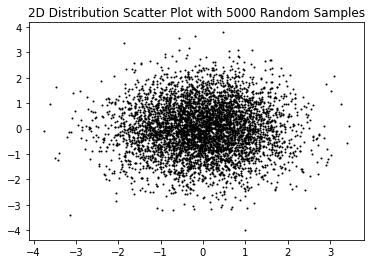

In [39]:
mean_X = [0, 0]
mean_Y = [2, 6]
cov_X = [[1, 0], [0, 1]]
cov_Y = [[2, 1], [1, 2]]

X = np.random.multivariate_normal(mean_X, cov_X, 5000).T

#Scatter plot
plt.title("2D Distribution Scatter Plot with 5000 Random Samples")
plt.scatter(X[0,:], X[1,:], s=1, c='black')

### (ii)

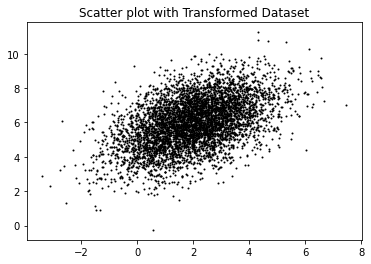

In [41]:
# Apply transformation obtained from part (b)(iv) to dataset X
A = (1 / np.sqrt(2)) * np.array([[np.sqrt(3), -1], [np.sqrt(3), 1]])
Y = np.matmul(A, X)
Y += np.array(mean_Y)[:, None]
plt.title("Scatter plot with Transformed Dataset")
plt.scatter(Y[0,:], Y[1,:], s=1, c='black')

### (iii)

In [42]:
# Estimate kde of transformed dataset Y
gauss_kde = stats.gaussian_kde(Y)

def integrand(x, y, Y, gauss_1, mean_1, cov_1):
    gauss_2 = stats.multivariate_normal(mean_1, cov_1)
    diff = gauss_1.pdf([x, y]) - gauss_2.pdf([x, y])
    return diff ** 2

In [36]:
from scipy import integrate

# Computer L2 loss function
l2_diff_, err = integrate.dblquad(
    func=integrand,
    a=-10,
    b=10,
    gfun=lambda x: -10,
    hfun=lambda x: 10,
    args=(Y, gauss_kde, mean_Y, cov_Y)
)

l2_diff = np.sqrt(l2_diff_)
print("L2 difference between theoretical and estimated Gaussian is " + str(l2_diff))

L2 difference between theoretical and estimated Gaussian is 0.013758788471366298


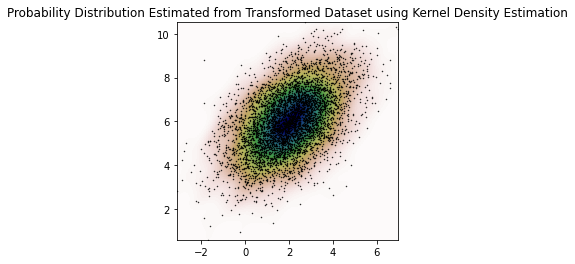

In [38]:
# Plot estimated distribution on top of transformed dataset Y
x_min = min(Y[0,:])
x_max = max(Y[0,:])
y_min = min(Y[1,:])
y_max = max(Y[1,:])
est_dist = stats.gaussian_kde(Y)
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([x.ravel(), y.ravel()])
Z = np.reshape(est_dist(positions).T, x.shape)

plt.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[x_min, x_max, y_min, y_max])
plt.title("Probability Distribution Estimated from Transformed Dataset using Kernel Density Estimation")
plt.scatter(Y[0,:], Y[1,:], s=0.2, c='black')
plt.show()

The L2 difference between probability distribution estimated from transformed dataset and Gaussian is e-2. So we could fit normalized Gaussian to transformed dataset instead of kernel density estimation.

# Exercise 4:

## (a)

Denotes,
$$
[A]_{j,k}=a_{jk}
$$

$$
|x^TAy| = |\sum_{j=1}^{m}\sum_{k=1}^{n} a_{jk}x_{j}y_k|\\
\le |\sum_{j=1}^{m}\sum_{k=1}^{n} (|a_{jk}|^{\frac{1}{2}}|x_j|)(|a_{jk}|^{\frac{1}{2}}|y_k|)|\\
\le \sqrt{\sum_{j=1}^{m}\sum_{k=1}^{n} |a_{jk}|x_j^2}  \sqrt{\sum_{j=1}^{m}\sum_{k=1}^{n}|a_{jk}|y_k^2}\\
\le \sqrt{\sum_{j=1}^{m} (max_j\sum_{k=1}^{n}|a_{jk}|)x_j^2}  \sqrt{\sum_{k=1}^{n}(max_k\sum_{j=1}^{m}|a_{jk}|)y_k^2}\\
=\sqrt{RC}\sqrt{\sum_jx_j^2}\sqrt{\sum_ky_k^2}\\
=\sqrt{RC}||x||_2||y||_2
$$

## (b)

### (i)
If the positive definite matrix is not invertible, then the null space of A is nontrivial. So there exists 
$$
Ax=0=0x
$$
, and the eigenvalue of A is 0.

### (ii)
Consider
$$
f(x,y)=\frac{1}{2}x^2+2xy+\frac{1}{2}y^2
$$

then
$$
\nabla^2f(x,y)=\begin{bmatrix}1&2\\2&1\end{bmatrix}
$$

The matrix here is invertible, but the eigenvalues are -1 and 3. So it is not even positive semi-definite.

### (iii)

When the matrix defined both positive semi-definiteness and invertibility, then the matrix would be positive definite.

## (c)
$$
AA^{†}A=(U\Lambda U^T)(UΛ^-U^T)(U\Lambda U^T)\\
=UΛΛ^-U^T(U\Lambda U^T)\\
=(\sum_{i=1}^{k}[U]_{:,i}[U]_{:,i}^T)(\sum_{j=1}^{k}[Λ]_{j,j}[U]_{:,j}[U]_{:,j}^T)\\
=\sum_{i=1}^{k} \sum_{j=1}^{k} [Λ]_{i,i}[U]_{:,i}[U]_{:,i}^T[U]_{:,j}[U]_{:,j}^T\\
=\sum_{i=1}^{k} \sum_{j=1}^{k} [Λ]_{i,i}\delta (i=j)[U]_{:,i}[U]_{:,j}^T\\
=\sum_{i=1}^{k} [Λ]_{i,i} [U]_{:,i} [U]_{:,i}^T
$$